In [1]:
# Dependencies and Setup    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)


610

## Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Build a query to get the data for a specific city
query = f"{url}appid={weather_api_key}&q={city}"
# print(query)

In [4]:
# # set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


# # Loop through the list of cities and perform a request for data on each
for city in cities:


    #   Get weather data
    response = requests.get(query).json()
   

    # Get the weather factors and store them
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    
               
#     print(f"Data for {city} was found.")

## Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [5]:
# Create a data frame from from append lists
weather_dict = {
    'City': cities,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grand river south east,-34.5322,20.0403,287.19,85,83,1.45,ZA,1633630710
1,pierre,-34.5322,20.0403,287.19,85,83,1.45,ZA,1633630710
2,albany,-34.5322,20.0403,287.19,85,83,1.45,ZA,1633630710
3,taolanaro,-34.5322,20.0403,287.19,85,83,1.45,ZA,1633630710
4,illoqqortoormiut,-34.5322,20.0403,287.19,85,83,1.45,ZA,1633630710


In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,6.390000e+02,6.390000e+02,6.390000e+02,639.0,639.0,6.390000e+02,6.390000e+02
mean,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
std,2.915507e-13,1.137759e-13,3.640829e-12,0.0,0.0,6.444338e-15,0.000000e+00
min,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
25%,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
50%,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
75%,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
max,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [6]:
# Get the indices of cities that have humidity over 100%.

# BY DEFINITION, 100% humidity is as high as physically possible therefore no cities
# have a higher than 100% humidity. But just to be sure:
# weather_data.sort_values('Humidity')

# Test to see whether weather is wetter than 100
wet_weather = weather_data[(weather_data['Humidity'] > 100)]
# wet_weather

# Get rid of any data that claims more than 100 humidity
# MAY HAVE TO SAY:  If humidity is > 100 , then drop...
# clean_weather = weather_data.drop(wet_weather, inplace = False)

wet_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

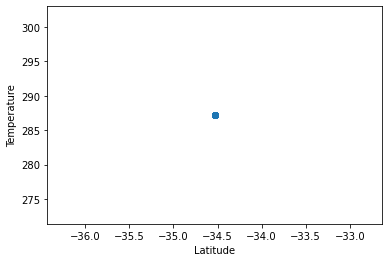

In [7]:
# Lat vs Temp
plt.scatter(weather_data['Lat'],weather_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('lat_vs_temp.png')
plt.show()

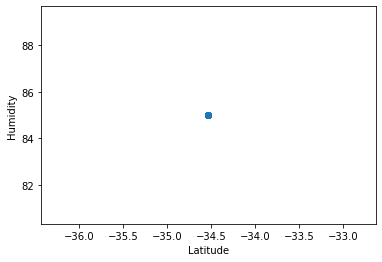

In [8]:
# Lat vs Humidity
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('lat_vs_humidity.png')
plt.show()

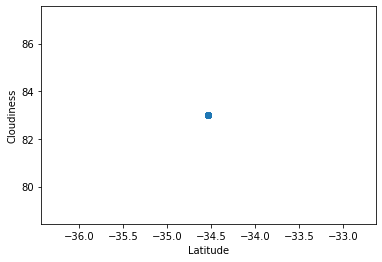

In [9]:
# Lat vs Cloudiness
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('lat_vs_cloudiness.png')
plt.show()

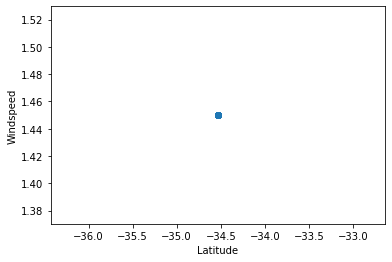

In [10]:
# Lat vs Windspeed
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [38]:
# Test whether city latitude is north (> 0) or south (< o)
# put in North or South bin and do regression

weather_data['Hemisphere'] = ['North' if x > 0 else 'South' for x in weather_data['Lat']]
# weather_data

south_cities = weather_data[weather_data['Hemisphere'] == 'South']
north_cities = weather_data[weather_data['Hemisphere'] == 'North']


In [36]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression  *****EMPTY*****

# x_values = north_cities['Lat']
# y_values = north_cities['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

The r-squared is: 1.0


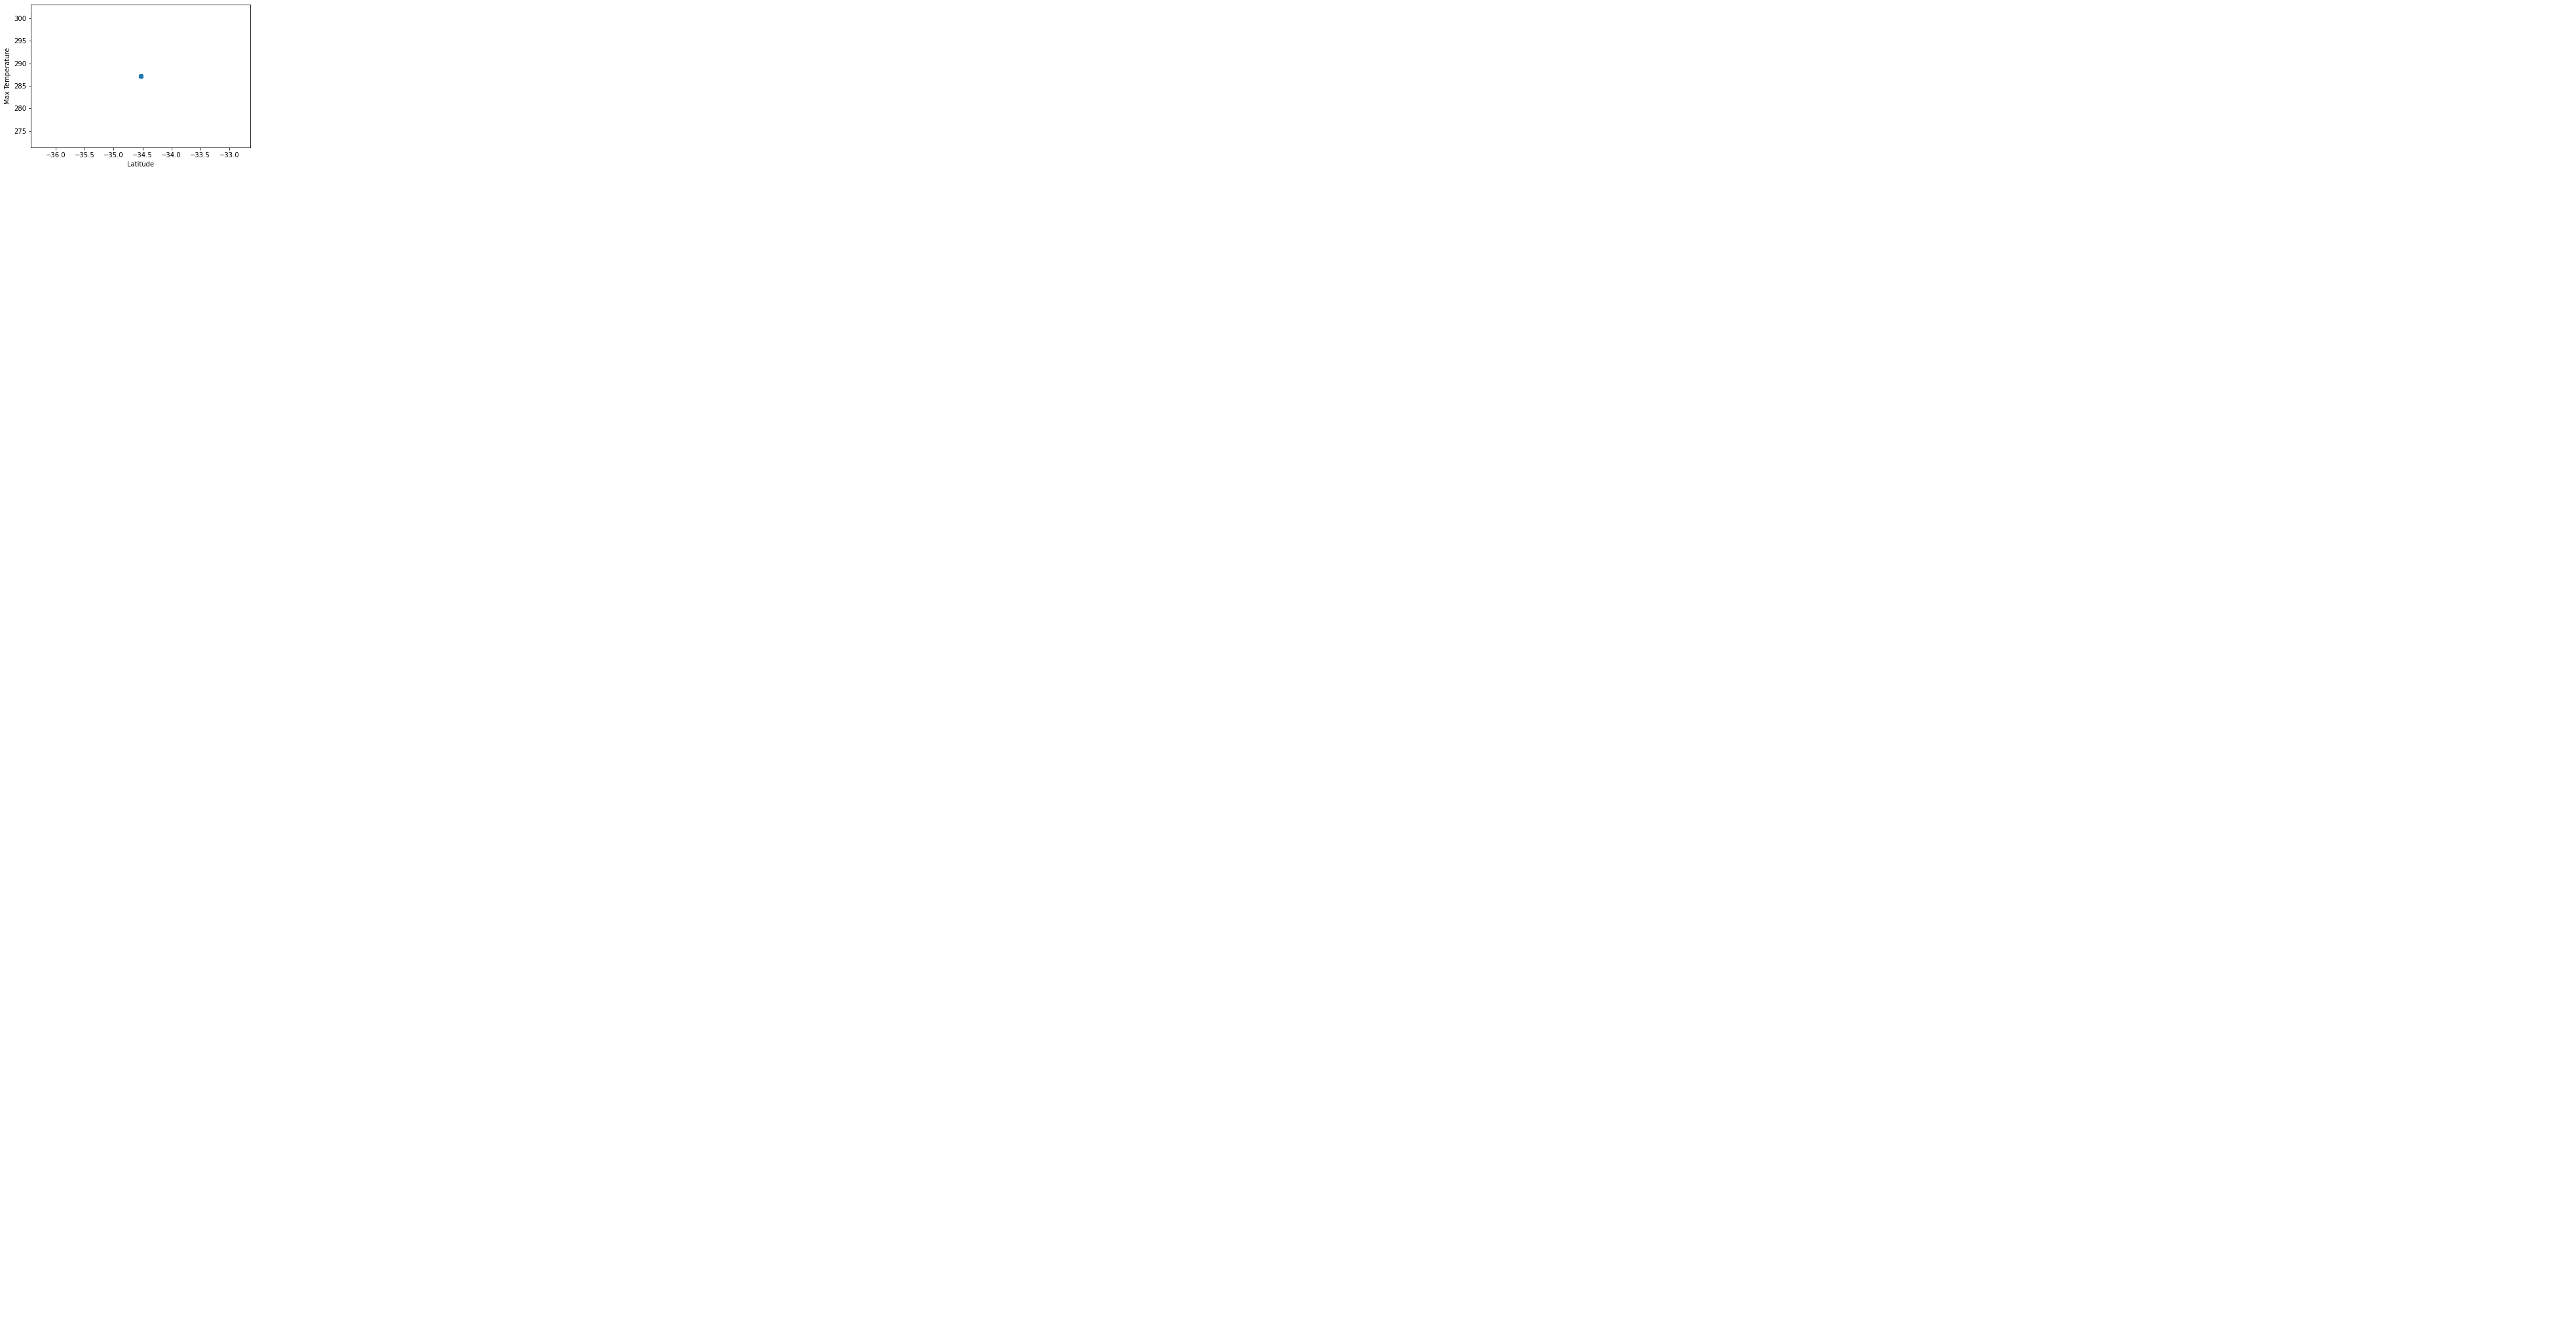

In [39]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [41]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression  *****EMPTY*****

# x_values = North_cities['Lat']
# y_values = North_cities['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

The r-squared is: 0.0


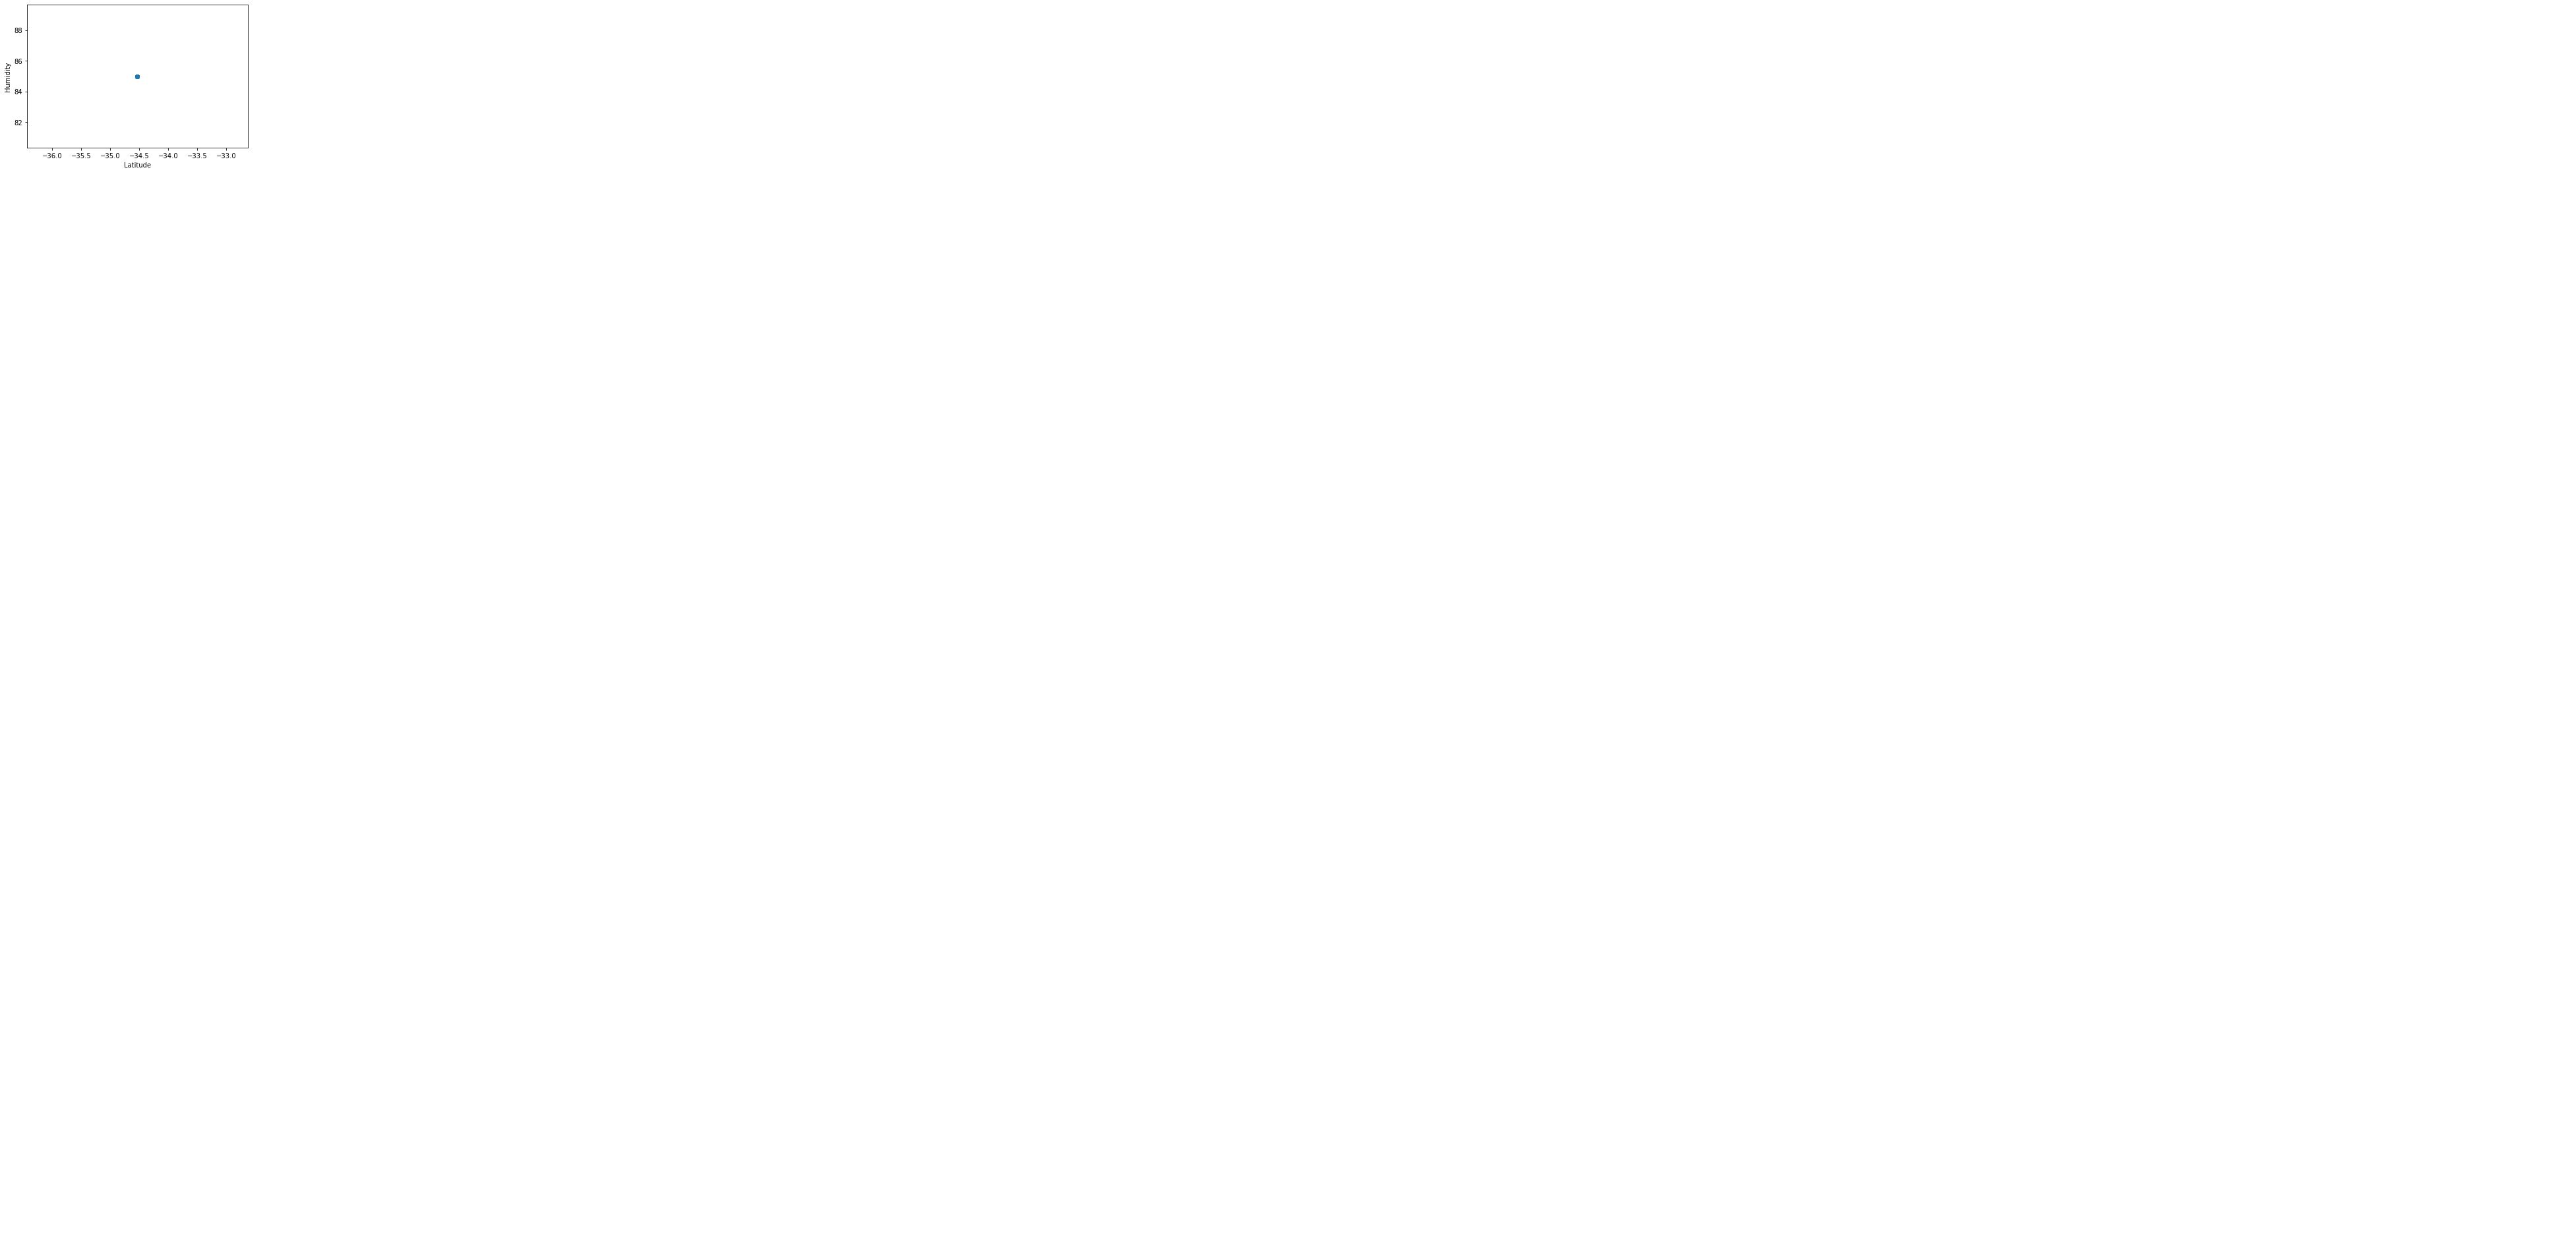

In [42]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# x_values = North_cities['Lat']
# y_values = North_cities['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()


In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# x_values = North_cities['Lat']
# y_values = North_cities['Wind Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()


In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()